In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
# Statistics
from evaluation.classification.statistics import get_precisions
# Visualize
from evaluation.classification.visualize import plot_df_distrib_size
# utils
from evaluation.classification.utils import get_size_list_from_xte
%matplotlib inline
plt.style.use("ggplot")

### --- compare precision with population ---

In [2]:
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/validation_matrix.csv')
resnet50_randomsizecrop = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_randomsizecrop/validation_matrix.csv')
resnet50_regionconfusionmechanism = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_regionconfusionmechanism/validation_matrix.csv')
resnet50_autoaugment = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_lr1e-5_crossvalid_autoaugment/validation_matrix.csv')

In [3]:
resnet50_precisions = get_precisions(resnet50)
resnet50_randomsizecrop_precisions = get_precisions(resnet50_randomsizecrop)
resnet50_regionconfusionmechanism_precisions = get_precisions(resnet50_regionconfusionmechanism)
resnet50_autoaugment_precisions = get_precisions(resnet50_autoaugment)

In [4]:
exp_name = ["resnet50", "resnet50_randomsizecrop", "resnet50_regionconfusionmechanism", "resnet50_autoaugment"]
exp_ap = [resnet50_precisions.mean(), resnet50_randomsizecrop_precisions.mean(), resnet50_regionconfusionmechanism_precisions.mean(), resnet50_autoaugment_precisions.mean()]

In [5]:
df = pd.DataFrame({"exp_name": exp_name, "exp_ap": exp_ap})
df

,exp_name,exp_ap
0,resnet50,0.878885
1,resnet50_randomsizecrop,0.828768
2,resnet50_regionconfusionmechanism,0.873346
3,resnet50_autoaugment,0.856100


In [6]:
df_per_label = pd.DataFrame({"resnet50": resnet50_precisions, "resnet50_randomsizecrop": resnet50_randomsizecrop_precisions, "resnet50_regionconfusionmechanism": resnet50_regionconfusionmechanism_precisions, "resnet50_autoaugment": resnet50_autoaugment_precisions})

In [7]:
new_df_per_label = pd.DataFrame()
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[1], index=df_per_label.columns, name='Ephemeridae'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[4], index=df_per_label.columns, name='Plecoptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[2], index=df_per_label.columns, name='Ephemeroptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[5], index=df_per_label.columns, name='Trichoptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[3], index=df_per_label.columns, name='Lepidoptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[0], index=df_per_label.columns, name='Diptera'))
new_df_per_label

,resnet50,resnet50_autoaugment,resnet50_randomsizecrop,resnet50_regionconfusionmechanism
Ephemeridae,0.960784,0.882353,0.921569,0.960784
Plecoptera,0.823077,0.792308,0.761538,0.807692
Ephemeroptera,0.764045,0.764045,0.601124,0.741573
Trichoptera,0.911290,0.875000,0.879032,0.911290
Lepidoptera,0.887640,0.898876,0.895131,0.872659
Diptera,0.926471,0.924020,0.914216,0.946078


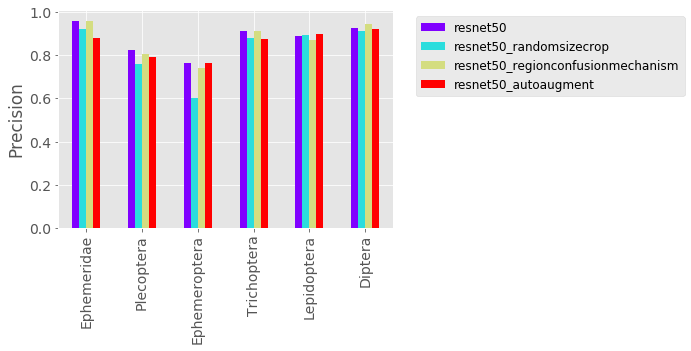

In [9]:
plt.rcParams["font.size"] = 14
new_df_per_label.plot(kind="bar", y=["resnet50", "resnet50_randomsizecrop", "resnet50_regionconfusionmechanism", "resnet50_autoaugment"], cmap="rainbow")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_augmentation/compare_precision_resnet50.png", bbox_inches="tight")

### --- compare accuracy distribution of size ---

In [11]:
cls_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/each_size_df.csv')
cls_each_size_df["order"] = cls_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(cls_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})

In [12]:
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/all_size_df.csv')
resnet50_randomsizecrop = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_randomsizecrop/all_size_df.csv')
resnet50_regionconfusionmechanism = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_regionconfusionmechanism/all_size_df.csv')
resnet50_autoaugment = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_lr1e-5_crossvalid_autoaugment/all_size_df.csv')

In [13]:
resnet50 = resnet50.drop(resnet50.index[[0]])
resnet50_randomsizecrop = resnet50_randomsizecrop.drop(resnet50_randomsizecrop.index[[0]])
resnet50_regionconfusionmechanism = resnet50_regionconfusionmechanism.drop(resnet50_regionconfusionmechanism.index[[0]])
resnet50_autoaugment = resnet50_autoaugment.drop(resnet50_autoaugment.index[[0]])

In [14]:
insect_size_df

,order,count
0,1.0,1
1,7.0,10
2,8.0,43
3,9.0,109
4,10.0,229
5,11.0,284
6,12.0,309
7,13.0,209
8,14.0,78
9,15.0,10


In [15]:
all_df = resnet50
all_df = all_df.rename(columns={'Accuracy': 'resnet50'})
all_df = all_df.assign(resnet50_randomsizecrop=resnet50_randomsizecrop["Accuracy"])
all_df = all_df.assign(resnet50_regionconfusionmechanism=resnet50_regionconfusionmechanism["Accuracy"])
all_df = all_df.assign(resnet50_autoaugment=resnet50_autoaugment["Accuracy"])
all_df = all_df.assign(count=insect_size_df["count"])
all_df

,Unnamed: 0,order,resnet50,Insect_size,resnet50_randomsizecrop,resnet50_regionconfusionmechanism,resnet50_autoaugment,count
1,1,7.0,1.000000,208.900000,1.000000,0.900000,1.000000,10
2,2,8.0,0.883721,400.651163,0.790698,0.883721,0.860465,43
3,3,9.0,0.761468,778.706422,0.660550,0.798165,0.715596,109
4,4,10.0,0.812227,1510.864629,0.703057,0.799127,0.772926,229
5,5,11.0,0.855634,2949.616197,0.855634,0.873239,0.859155,284
6,6,12.0,0.932039,5938.822006,0.922330,0.912621,0.938511,309
7,7,13.0,0.971292,11264.789474,0.942584,0.976077,0.952153,209
8,8,14.0,0.948718,22344.653846,0.935897,0.923077,0.961538,78
9,9,15.0,0.800000,34865.400000,0.800000,0.800000,0.800000,10


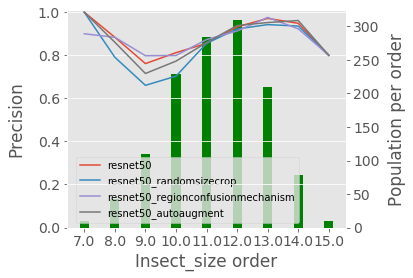

In [16]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7.0", "8.0", "9.0", "10.0", "11.0", "12.0", "13.0", "14.0", "15.0"]

ax1.bar(x_label, all_df["count"], width=0.3, color="g")
ax2.plot(x_label, all_df["resnet50"], label="resnet50")
ax2.plot(x_label, all_df["resnet50_randomsizecrop"], label="resnet50_randomsizecrop")
ax2.plot(x_label, all_df["resnet50_regionconfusionmechanism"], label="resnet50_regionconfusionmechanism")
ax2.plot(x_label, all_df["resnet50_autoaugment"], label="resnet50_autoaugment")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.85, 0.), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect_size order")
ax1.set_ylabel("Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per order")
ax2.set_ylim(0., 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_augmentation/compare_precision_distrib_of_size.png", bbox_inches="tight")